# Distribution and Regression in BMI Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
# read the csv file
df = pd.read_csv('bmi.csv')

In [3]:
# print the first 5 rows of the data set
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
# print the last 5 rows of the data set
df.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [5]:
# shape of the dataframe
df.shape

(500, 4)

In [6]:
# data type of each column
df.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [7]:
# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [8]:
# number of unique values of column Gender
df.Gender.nunique()

2

In [9]:
# unique values of column Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

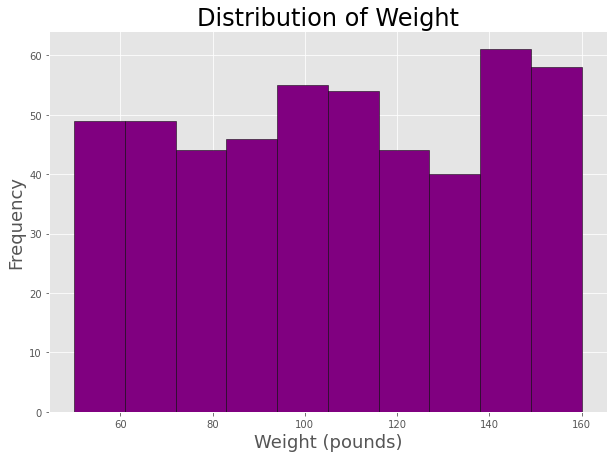

In [10]:
plt.style.use('ggplot')
# histogram of the weight
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

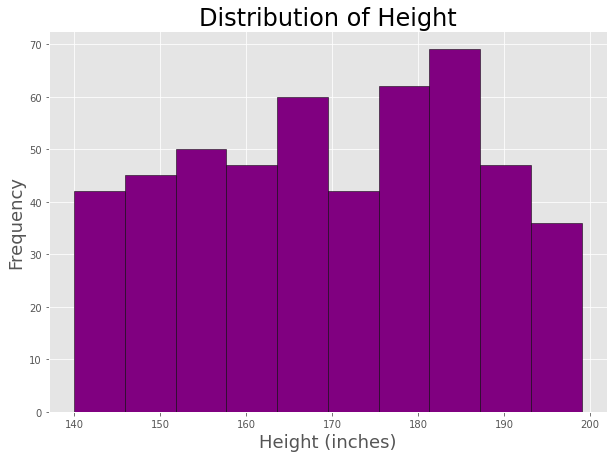

In [11]:
# histogram of the height
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

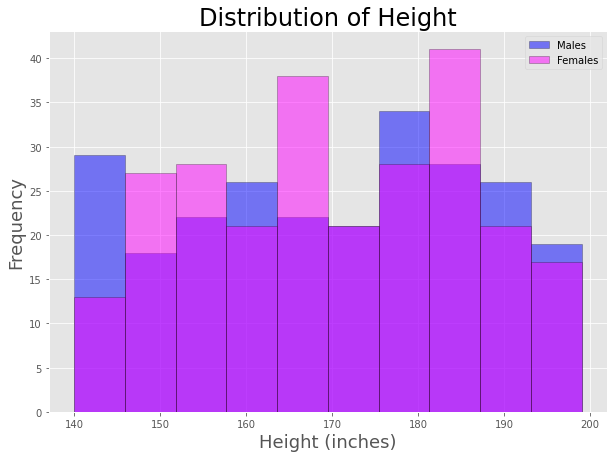

In [12]:
# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

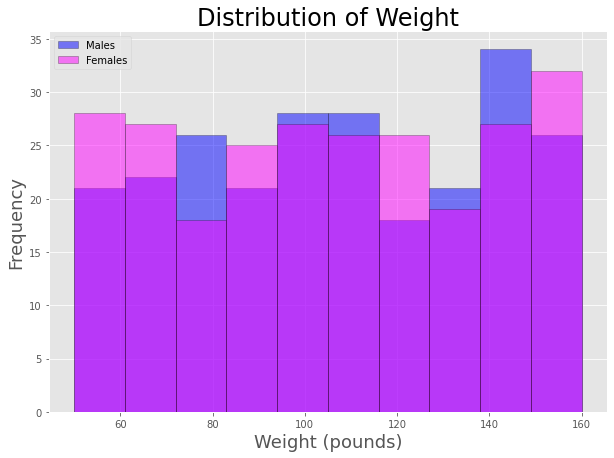

In [13]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

In [14]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Index_male,Height_female,Weight_female,Index_female
count,245.000000,245.000000,245.000000,255.000000,255.000000,255.000000
mean,169.648980,106.314286,3.787755,170.227451,105.698039,3.709804
std,17.065665,31.832734,1.386355,15.711825,32.962025,1.325886
min,140.000000,50.000000,0.000000,140.000000,50.000000,0.000000
25%,154.000000,80.000000,3.000000,157.000000,79.000000,3.000000
50%,171.000000,105.000000,4.000000,170.000000,106.000000,4.000000
75%,183.000000,137.000000,5.000000,184.000000,135.000000,5.000000
max,199.000000,160.000000,5.000000,199.000000,160.000000,5.000000


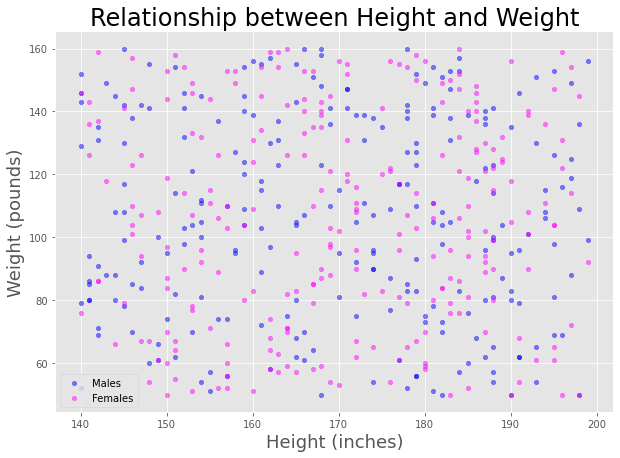

In [15]:
# Scatter plot of Height and Weight

ax=df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7),ax=ax)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

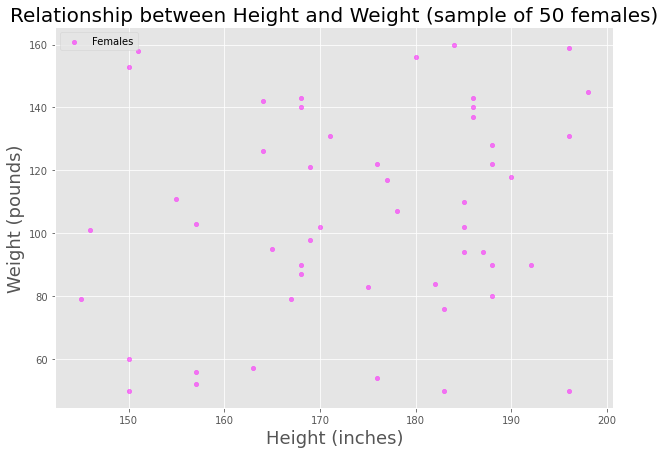

In [16]:
# Scatter plot of 50 females

sample_females = df[df['Gender'] == 'Female'].sample(50)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 50 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [17]:
# best fit polynomials
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)


# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

In [18]:
print(male_fit)
print(female_fit)

[-4.87458921e-02  1.14583977e+02]
[5.78365443e-02 9.58526717e+01]


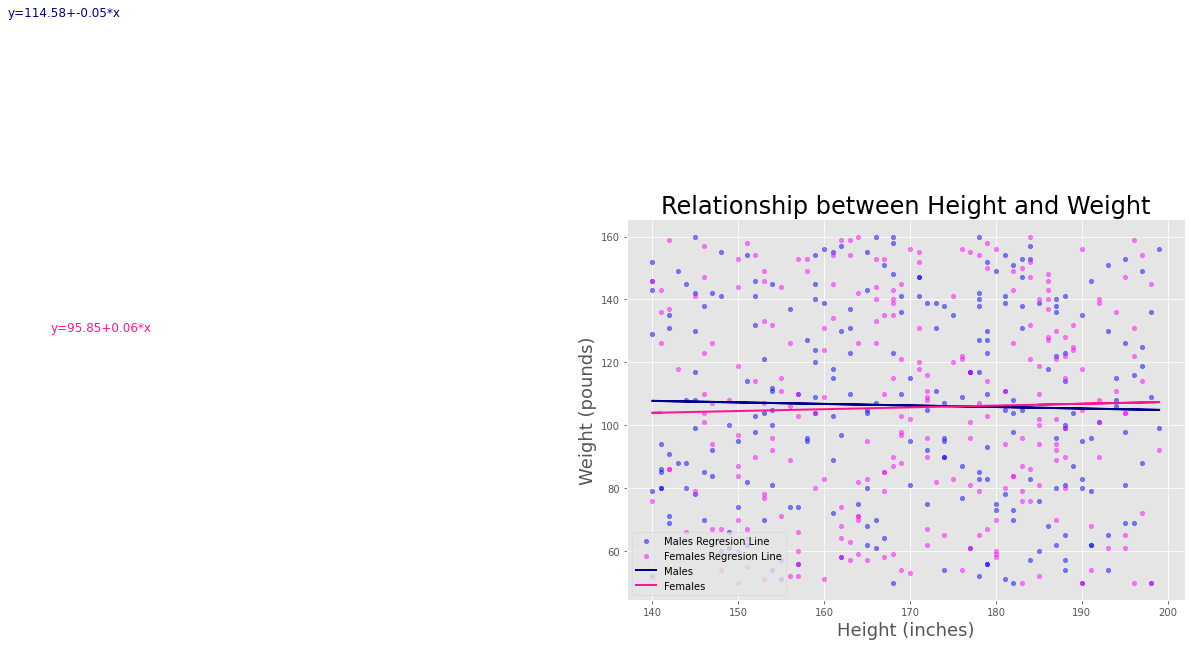

In [19]:
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

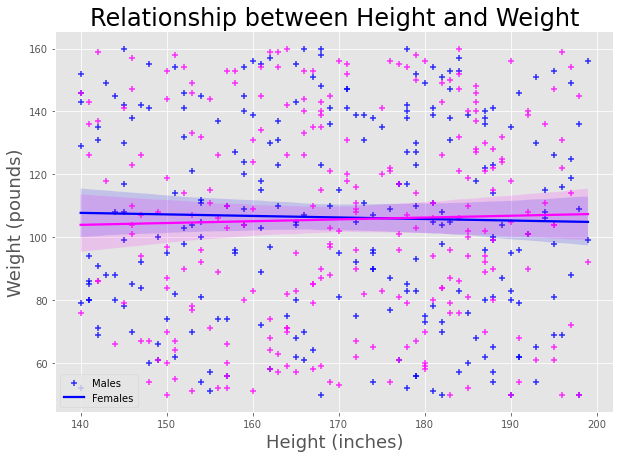

In [20]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

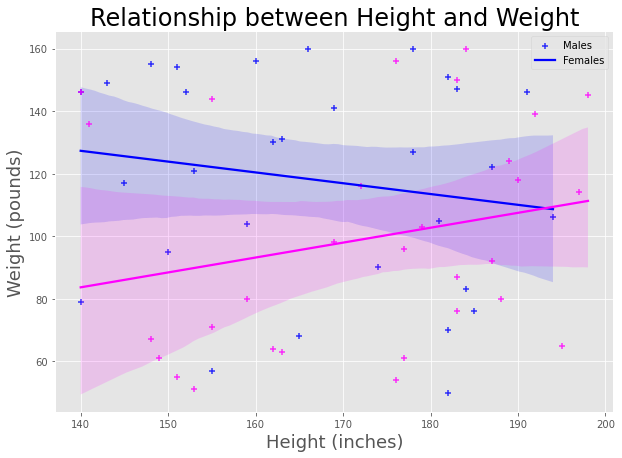

In [21]:
# 30 random samples
df_males_sample = df[df['Gender'] == 'Male'].sample(30)
df_females_sample = df[df['Gender'] == 'Female'].sample(30)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='blue', marker='+')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta', marker='+')

# legend, title, and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [22]:
df_males = df[df['Gender'] == 'Male']

# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['Height']], df_males['Weight'])

# get the slope and intercept of the line best fit
print("Intercept of male : ",lr_males.intercept_)

print("Regression Coefficient/ Slope of Male : {}".format(lr_males.coef_))


df_females = df[df['Gender'] == 'Female']

# create linear regression object
lr_females = LinearRegression()

# fit linear regression
lr_females.fit(df_females[['Height']], df_females['Weight'])

# get the slope and intercept of the line best fit
print("Intercept of Female : ",lr_females.intercept_)

print("Regression Coefficient/ Slope of Female : {}".format(lr_females.coef_))

Intercept of male :  114.58397655987223
Regression Coefficient/ Slope of Male : [-0.04874589]
Intercept of Female :  95.85267170072629
Regression Coefficient/ Slope of Female : [0.05783654]


In [23]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# correlation coefficients 
df_males.corr()

,Height,Weight,Index
Height,1.000000,-0.026133,-0.476934
Weight,-0.026133,1.000000,0.790888
Index,-0.476934,0.790888,1.000000


In [24]:
#Pearson correlation coefficient
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# correlation coefficients 
df_females.corr()

,Height,Weight,Index
Height,1.000000,0.027569,-0.362132
Weight,0.027569,1.000000,0.819280
Index,-0.362132,0.819280,1.000000


In [25]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)

print(pearson_coef)
# 0.849608591418601

# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print(pearson_coef)
# 0.8629788486163176

0.02756862409201923
-0.02613288209731738


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


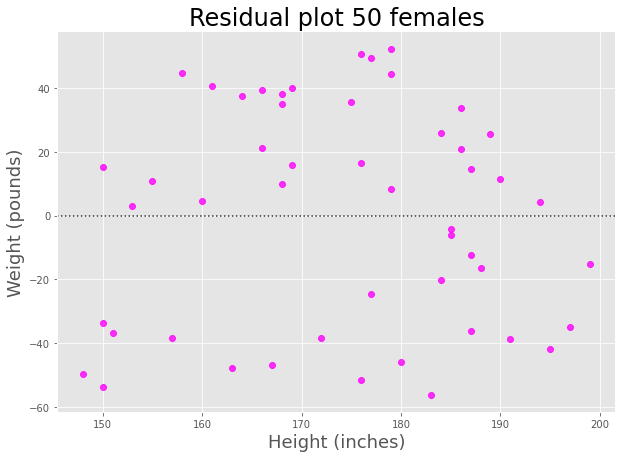

In [26]:
# Residual plots
import seaborn as sns

# dataframe containing only females
df_females = df[df['Gender'] == 'Female'].sample(50)

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_females.Height, df_females.Weight, color='magenta')

# title and labels
plt.title('Residual plot 50 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

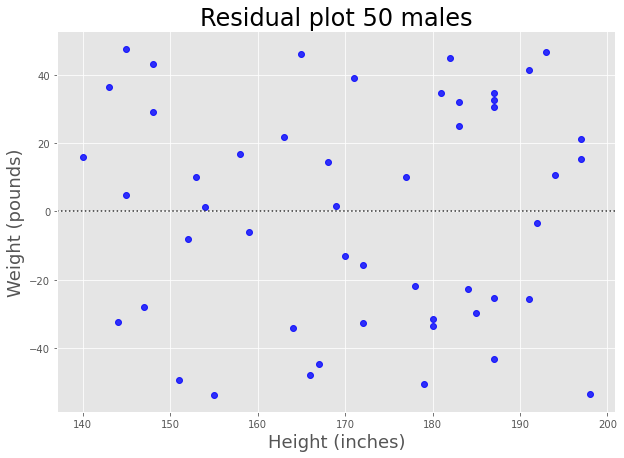

In [27]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male'].sample(50)

# residual plot 500 males
fig = plt.figure(figsize=(10, 7))
sns.residplot(df_males.Height, df_males.Weight, color='blue')

# title and labels
plt.title('Residual plot 50 males', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [28]:
df_females = df[df['Gender'] == 'Female']

# fit the model using numpy
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

# predictions using numpy
print(np.polyval(female_fit, [60]))
# [113.62953114]

# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])

# predictions using scikit learn
print(lr_females.predict([[60]]))
# [113.62953114]

[99.32286436]
[99.32286436]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
